In [3]:
aset = data["aut"]

In [1]:
import torch
from autograph.lib.mcts_aut import AutStats
from autograph.lib.automata import style_agraph
from IPython.display import SVG, display

In [2]:
checkpoint = "autograph/play/checkpoints/mine_woodfactory/mcts_simple_aut_endrew_mazenet"
data = torch.load(checkpoint, map_location="cpu")

FileNotFoundError: [Errno 2] No such file or directory: 'autograph/play/checkpoints/mine_woodfactory/mcts_simple_aut_endrew_mazenet'

In [4]:
astats = data["aut_stats"]

In [5]:
repr(astats)

"{'n': [1190, 868, 1096, 839], 'w': [839.0, 826.0, 839.0, 839.0]}"

In [6]:
sobj = AutStats(len(aset.graph.network))
sobj.load_state_dict(astats)

In [7]:
[sobj.v(i) for i in range(len(aset.graph.network))]

[0.7050420168067227, 0.9516129032258065, 0.7655109489051095, 1.0]

In [8]:
sobj.baseline()

0.7050420168067227

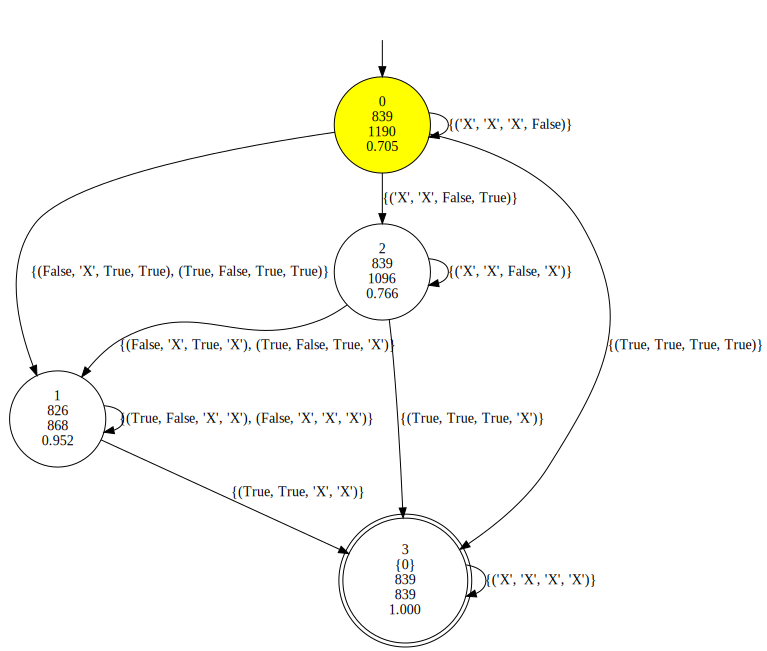

In [9]:
g = style_agraph(aset.graph.network, [0], False)
for state in aset.graph.network:
    g.get_node(state).attr["label"] += ("\n%i\n%i\n%.3f" % (sobj.local_w[state], sobj.local_n[state], sobj.v(state)))
g.layout(prog="dot")
SVG(g.draw(format="svg"))